In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import matplotlib.pyplot as plt
import numpy as np
from utils import Experiment

In [22]:
%matplotlib inline

In [25]:
config = 'config.yaml'
exp = Experiment(config)

Seed: 0


In [37]:
x0 = exp.generate_data(mu_inj=0, n=10000)
x1 = exp.generate_data(mu_inj=1, n=10000)

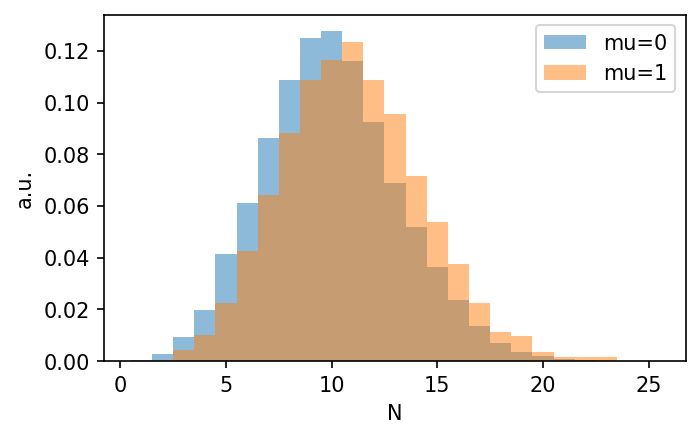

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3), dpi=150)

n_max = max(x0.max(), max(x1).max())
integer_bins = np.linspace(0, n_max, n_max+1) + 0.5
ax.hist(x0.flatten(), bins=integer_bins, alpha=0.5, label='mu=0', density=True)
ax.hist(x1.flatten(), bins=integer_bins, alpha=0.5, label='mu=1', density=True)
ax.legend()
ax.set_xlabel('N')
ax.set_ylabel('a.u.')
plt.show()

In [85]:
mu_scan = np.linspace(0, 10, 10)
exp.get_q_distributions(mu_scan, n=1000)

100%|██████████| 10/10 [00:01<00:00,  6.06it/s]


<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
/var/folders/40/2yzrw8k93wdctqr9dxlvkrfh0000gn/T/ipykernel_3708/2714451292.py:19: SyntaxWarning: invalid escape sequence '\m'
  ax.hist(exp.q_distributions[mu_scan[i]], label='$\mu_{inj}$=' + f'{mu_scan[i]:.2f}', bins=bins, alpha=0.5, density=True)
/var/folders/40/2yzrw8k93wdctqr9dxlvkrfh0000gn/T/ipykernel_3708/2714451292.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


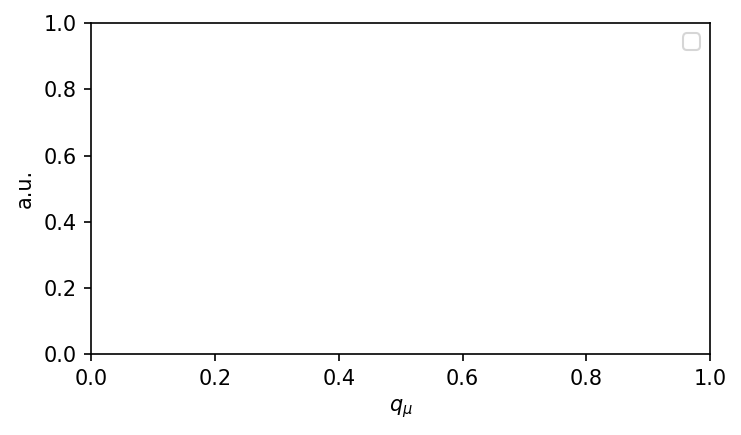

In [86]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Create the figure and axis
fig, ax = plt.subplots(1, 1, figsize=(5, 3), dpi=150)
bins = np.linspace(0, 1, 40)

# Initialize the plot
def init():
    ax.clear()
    ax.set_xlabel('$q_{\\mu}$')
    ax.set_ylabel('a.u.')
    ax.legend()
    return ax,

# Update function for each frame
def update(i):
    ax.clear()
    ax.hist(exp.q_distributions[mu_scan[i]], label='$\mu_{inj}$=' + f'{mu_scan[i]:.2f}', bins=bins, alpha=0.5, density=True)
    ax.set_xlabel('$q_{\\mu=' + f'{exp.mu:.2f}' + '}$')
    ax.set_ylabel('a.u.')
    ax.set_ylim(0, 50)
    ax.set_xlim(bins[0], bins[-1])
    ax.legend()
    plt.tight_layout()
    return ax,

# Create the animation
ani = FuncAnimation(fig, update, frames=len(mu_scan), init_func=init, blit=False)

# Display the animation
HTML(ani.to_jshtml())